<a href="https://colab.research.google.com/github/seunga2590/Machine-Learning/blob/main/DNN(PM10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
col_names = ['seoul', 'code','loc','date','SO2','CO','O3','NO2','PM10','PM25','adr']

df = pd.read_excel('/content/drive/My Drive/Data/data_sum.xlsx', names = col_names)
df

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN,서울 노원구 화랑로 429
1025851,서울 노원구,111312,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN,서울 노원구 화랑로 429
1025852,서울 노원구,111312,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN,서울 노원구 화랑로 429
1025853,서울 노원구,111312,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN,서울 노원구 화랑로 429


In [3]:
df1 = pd.read_excel('/content/drive/My Drive/Data/data_sum1.xlsx', names = col_names)
df1

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN,서울 노원구 화랑로 429
1025851,서울 노원구,111312,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN,서울 노원구 화랑로 429
1025852,서울 노원구,111312,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN,서울 노원구 화랑로 429
1025853,서울 노원구,111312,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN,서울 노원구 화랑로 429


In [4]:
seo = df1['seoul'] == '서울'
seo

0           True
1           True
2           True
3           True
4           True
           ...  
1025850    False
1025851    False
1025852    False
1025853    False
1025854    False
Name: seoul, Length: 1025855, dtype: bool

In [5]:
df_seo = df1[seo]

In [6]:
df_seo1 = df_seo.drop(['seoul','code'], axis=1)
df_seo1

,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...
684210,화랑로,2016123120,0.005,1.0,0.004,NaN,70.0,NaN,서울 노원구 화랑로 429
684211,화랑로,2016123121,0.005,1.3,0.004,NaN,84.0,NaN,서울 노원구 화랑로 429
684212,화랑로,2016123122,0.005,1.3,0.004,NaN,84.0,NaN,서울 노원구 화랑로 429
684213,화랑로,2016123123,0.005,1.2,0.004,NaN,72.0,NaN,서울 노원구 화랑로 429


In [7]:
df_seo2 = df_seo1.replace('화랑로','노원구')
df_seo3 = df_seo2.replace('한강대로','용산구')
df_seo4 = df_seo3.replace('강남대로','서초구')
df_seo5 = df_seo4.replace('강변북로','성동구')
df_seo6 = df_seo5.replace('공항대로','강서구')
df_seo7 = df_seo6.replace('도산대로','강남구')
df_seo8 = df_seo7.replace('동작대로 중앙차로','동작구')
df_seo9 = df_seo8.replace('신촌로','마포구')
df_seo10 = df_seo9.replace('정릉로','성북구')
df_seo11 = df_seo10.replace('종로','종로구')
df_seo12 = df_seo11.replace('천호대로','강동구')
df_seo13 = df_seo12.replace('청계천로','중구')
df_seo14 = df_seo13.replace('홍릉로','동대문구')
df_seo15 = df_seo14.drop('adr', axis=1)
df_seo15

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
684210,노원구,2016123120,0.005,1.0,0.004,NaN,70.0,NaN
684211,노원구,2016123121,0.005,1.3,0.004,NaN,84.0,NaN
684212,노원구,2016123122,0.005,1.3,0.004,NaN,84.0,NaN
684213,노원구,2016123123,0.005,1.2,0.004,NaN,72.0,NaN


In [8]:
seoul = df1['seoul'] != '서울'
df_seoul = df1[seoul]
df_seoul1 = df_seoul.drop(['seoul','code','adr'], axis=1)
df_seoul2 = df_seoul1.reset_index()
df_seoul3 = df_seoul2.drop('index', axis=1)
df_seoul3

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2017010101,0.006,1.3,0.002,0.068,77.0,63.0
1,중구,2017010102,0.006,1.4,0.002,0.066,76.0,63.0
2,중구,2017010103,0.005,1.2,0.002,0.063,73.0,57.0
3,중구,2017010104,0.005,1.1,0.002,0.053,67.0,55.0
4,중구,2017010105,0.004,1.1,0.002,0.051,66.0,54.0
...,...,...,...,...,...,...,...,...
341635,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
341636,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
341637,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
341638,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [9]:
df_sum_1 = pd.concat([df_seo15, df_seoul3])
df_sum_1

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
341635,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
341636,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
341637,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
341638,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [10]:
df_a = pd.read_excel('/content/drive/My Drive/Data/data_sum2.xlsx', names = col_names)
df_a

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25,adr
0,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,화랑로,2020103120,0.003,0.5,0.013,0.051,NaN,NaN,서울 노원구 화랑로 429
986299,서울 노원구,111312,화랑로,2020103121,0.003,0.5,0.017,0.040,NaN,NaN,서울 노원구 화랑로 429
986300,서울 노원구,111312,화랑로,2020103122,0.003,0.5,0.014,0.043,NaN,NaN,서울 노원구 화랑로 429
986301,서울 노원구,111312,화랑로,2020103123,0.003,0.6,0.012,0.045,NaN,NaN,서울 노원구 화랑로 429


In [11]:
df_a1 = df_a.replace('화랑로','노원구')
df_a2 = df_a1.replace('한강대로','용산구')
df_a3 = df_a2.replace('강남대로','서초구')
df_a4 = df_a3.replace('강변북로','성동구')
df_a5 = df_a4.replace('공항대로','강서구')
df_a6 = df_a5.replace('도산대로','강남구')
df_a7 = df_a6.replace('동작대로 중앙차로','동작구')
df_a8 = df_a7.replace('신촌로','마포구')
df_a9 = df_a8.replace('정릉로','성북구')
df_a10 = df_a9.replace('종로','종로구')
df_a11 = df_a10.replace('천호대로','강동구')
df_a12 = df_a11.replace('청계천로','중구')
df_a13 = df_a12.replace('홍릉로','동대문구')
df_a14 = df_a13.drop(['seoul','code','adr'], axis=1)
df_a14

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0
1,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0
2,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0
3,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0
4,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0
...,...,...,...,...,...,...,...,...
986298,노원구,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,노원구,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,노원구,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,노원구,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [12]:
df_sum = pd.concat([df_sum_1, df_a14])
df_sum

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
986298,노원구,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,노원구,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,노원구,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,노원구,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [13]:
jung_gu = df_sum['loc'] == '중구'
df_jung_gu = df_sum[jung_gu]
df_jung_gu

,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...
959514,중구,2020103120,0.004,0.6,0.023,0.034,34.0,21.0
959515,중구,2020103121,0.005,0.5,0.021,0.030,32.0,20.0
959516,중구,2020103122,0.004,0.5,0.028,0.026,29.0,19.0
959517,중구,2020103123,0.005,0.6,0.030,0.023,26.0,18.0


In [14]:
df_jung_gu.to_excel('/content/drive/My Drive/Data/jung.xlsx')

import glob
import sys

all_data = pd.DataFrame()
for f in glob.glob('/content/drive/My Drive/parameter/parameter_*.xlsx'):
    df = pd.read_excel(f)
    all_data = all_data.append(df, ignore_index=True)
    
print(all_data.shape)

all_data.head()

all_data.to_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",header=False, index=False)

In [15]:
col_names2 = ['date','tem','rain','wind_s','wind_d','hum','pre']
df_atm = pd.read_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",names = col_names2)
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020-12-31 19:00:00,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2.3


In [16]:
date = df_atm['date']
date_1 = date[:51144]
date_1

0       2015-01-01 01:00:00
1       2015-01-01 02:00:00
2       2015-01-01 03:00:00
3       2015-01-01 04:00:00
4       2015-01-01 05:00:00
                ...        
51139   2020-10-31 20:00:00
51140   2020-10-31 21:00:00
51141   2020-10-31 22:00:00
51142   2020-10-31 23:00:00
51143   2020-11-01 00:00:00
Name: date, Length: 51144, dtype: datetime64[ns]

In [17]:
date = df_atm['date'].astype(str).str[0:13]
date1 = date.str.replace('-','')
date2 = date1.str.replace(' ','')
date2

0        2015010101
1        2015010102
2        2015010103
3        2015010104
4        2015010105
            ...    
52602    2020123119
52603    2020123120
52604    2020123121
52605    2020123122
52606    2020123123
Name: date, Length: 52607, dtype: object

In [18]:
df_atm['date']= date2
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020123119,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020123120,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020123121,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020123122,-7.4,NaN,2.5,270.0,66.0,2.3


In [19]:
df_atm1 = df_atm.sort_values(by='date', ascending=True)
df_atm1

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020123119,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020123120,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020123121,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020123122,-7.4,NaN,2.5,270.0,66.0,2.3


In [20]:
df_jung_gu1 = df_jung_gu.sort_values(by='date', ascending=True)
df_jung_gu2 = df_jung_gu1.groupby('date').mean()
df_jung_gu2

,SO2,CO,O3,NO2,PM10,PM25
date,,,,,,
2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN
2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0
2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0
2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0
2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0
...,...,...,...,...,...,...
2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5
2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0
2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5


In [21]:
df_jung_gu3 = df_jung_gu2.reset_index()
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0
...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5


In [22]:
df_atm2 = df_atm1[:51144]
df_atm2.to_excel('/content/drive/My Drive/parameter/jung_sum.xlsx')
df_atm2

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1


In [23]:
jung_atm = pd.read_excel('/content/drive/My Drive/lab/jung_sum_2.xlsx', index_col=0)
jung_atm

,date,tem,rain,wind_s,wind_d,hum,pre,wind_x,wind_y
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8,2.643416,-3.886174
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7,2.530930,-3.720805
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1,2.137230,-3.142013
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3,2.755902,-4.051544
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1,1.364125,2.445232
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7,1.315407,2.357903
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6,1.266688,2.270573
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1,0.974375,1.746595


In [24]:
df_jung_gu3['tem'] = jung_atm['tem']
df_jung_gu3['rain'] = jung_atm['rain']
df_jung_gu3['hum'] = jung_atm['hum']
df_jung_gu3['pre'] = jung_atm['hum']
df_jung_gu3['wind_x'] = jung_atm['wind_x']
df_jung_gu3['wind_y'] = jung_atm['wind_y']
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,NaN,33.0,33.0,2.643416,-3.886174
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,NaN,35.0,35.0,2.530930,-3.720805
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,NaN,37.0,37.0,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,NaN,35.0,35.0,2.755902,-4.051544
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,NaN,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,NaN,59.0,59.0,1.364125,2.445232
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,NaN,58.0,58.0,1.315407,2.357903
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,NaN,57.0,57.0,1.266688,2.270573
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,NaN,54.0,54.0,0.974375,1.746595


In [25]:
df_jung_gu3['rain'] = df_jung_gu3['rain'].fillna(0)

In [26]:
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015010102,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015010103,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015010105,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020103121,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020103122,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020103123,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [27]:
df_jung_gu3['date'] = date_1
df_jung_gu3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [28]:
df_final = df_jung_gu3.copy()

In [29]:
df_final

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [30]:
#PM10 Range = 0-400
#PM25 Range = 0-180
#Temperature = -25-45
#rain = >0
#wind_x, wind_y = -12-12
#Humidity = 0-100

pm10 = df_final['PM10']<400.0
df_fin = df_final.copy()

In [31]:
a = df_final['PM10']>400
a1 = df_final[a]
df_final[a]

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
1266,2015-02-22 19:00:00,0.0060,0.30,0.0250,0.0205,485.0,39.0,0.9,0.0,64.0,64.0,4.035966,0.721788
1267,2015-02-22 20:00:00,0.0060,0.30,0.0230,0.0235,585.0,35.0,0.5,0.0,64.0,64.0,4.725033,0.845021
1268,2015-02-22 21:00:00,0.0060,0.25,0.0235,0.0210,729.5,44.0,0.2,0.0,66.0,66.0,2.854708,0.510533
1269,2015-02-22 22:00:00,0.0060,0.30,0.0220,0.0210,755.0,49.0,-0.1,0.0,65.0,65.0,4.528157,0.809811
1270,2015-02-22 23:00:00,0.0055,0.30,0.0225,0.0190,788.5,49.0,-0.3,0.0,67.0,67.0,4.035966,0.721788
1271,2015-02-23 00:00:00,0.0050,0.35,0.0230,0.0170,828.5,50.0,-0.7,0.0,68.0,68.0,3.642213,0.651370
1272,2015-02-23 01:00:00,0.0055,0.35,0.0245,0.0145,822.0,50.0,-1.0,0.0,66.0,66.0,3.839090,0.686579
1273,2015-02-23 02:00:00,0.0055,0.35,0.0280,0.0105,812.0,53.0,-1.2,0.0,67.0,67.0,3.642213,0.651370
1274,2015-02-23 03:00:00,0.0055,0.30,0.0285,0.0095,833.0,52.0,-1.5,0.0,69.0,69.0,0.843643,-1.240268
1275,2015-02-23 04:00:00,0.0055,0.35,0.0270,0.0100,852.0,47.0,-1.9,0.0,67.0,67.0,2.067202,0.369696


In [32]:
df_fin1 = df_final.drop(a1.index, axis=0)
df_fin1

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595


In [33]:
df_fin2 = df_fin1.set_index('date')
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [34]:
from datetime import datetime

date = pd.to_datetime(df_fin2.index, format='%Y-%m-%d, %H:%M:%S')
date

DatetimeIndex(['2015-01-01 01:00:00', '2015-01-01 02:00:00',
               '2015-01-01 03:00:00', '2015-01-01 04:00:00',
               '2015-01-01 05:00:00', '2015-01-01 06:00:00',
               '2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51125, freq=None)

In [35]:
df_fin2['date'] = date

In [36]:
df_2015 = df_fin2[:8740]
df_2015

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,0.0095,1.00,0.0050,0.0655,81.0,48.0,0.3,0.0,77.0,77.0,1.350952,0.367325,2015-12-31 19:00:00
2015-12-31 20:00:00,0.0100,1.05,0.0025,0.0710,83.5,51.0,-0.1,0.0,81.0,81.0,0.771973,0.209900,2015-12-31 20:00:00
2015-12-31 21:00:00,0.0100,1.10,0.0025,0.0695,84.5,49.0,-0.7,0.0,84.0,84.0,1.157959,0.314850,2015-12-31 21:00:00


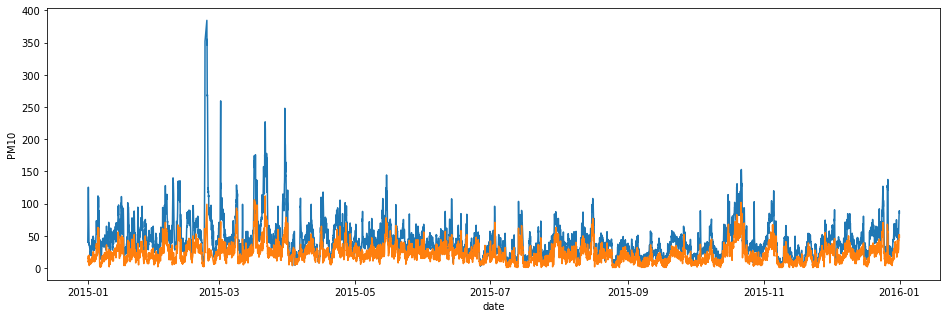

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
sns.lineplot(y=df_2015['PM10'], x=df_2015['date'])
sns.lineplot(y=df_2015['PM25'], x=df_2015['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [38]:
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [39]:
#interpolate 예제
from pandas import DataFrame, Series

datestrs = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)

ts = Series([1, np.nan, np.nan, 10], index=dates)
ts

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

In [40]:
ts_int = ts.interpolate(method='values')
ts_int

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

In [41]:
#interpolate 선형 그래프로 결측값 보간

df_fin3 = df_fin2.interpolate(method='values')
df_fin3

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [42]:
df_fin4 = df_fin3.dropna(how='any')
df_fin4

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


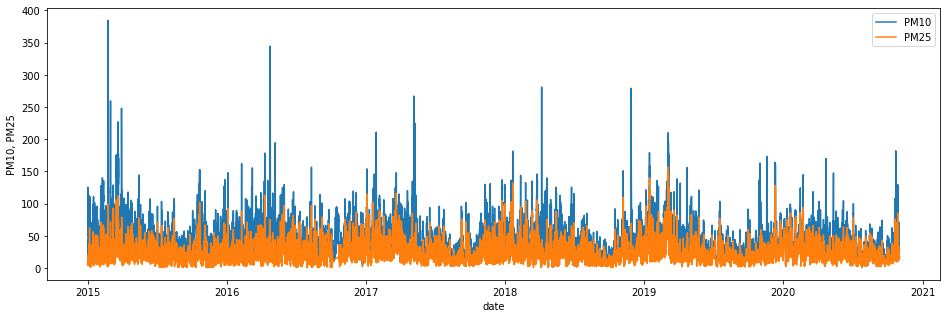

In [43]:
plt.figure(figsize=(16,5))
sns.lineplot(y=df_fin4['PM10'], x=df_fin4['date'])
sns.lineplot(y=df_fin4['PM25'], x=df_fin4['date'])
plt.xlabel('date')
plt.ylabel('PM10, PM25')
plt.legend(['PM10','PM25'])
plt.show()

In [44]:
df_fin4.corr()

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
SO2,1.000000,0.365862,-0.062242,0.445636,0.429785,0.316117,-0.147425,-0.066907,-0.151944,-0.151944,-0.003564,0.056843
CO,0.365862,1.000000,-0.365379,0.724043,0.490207,0.557435,-0.267725,-0.050503,0.020539,0.020539,-0.152904,0.004794
O3,-0.062242,-0.365379,1.000000,-0.409227,0.031503,0.015518,0.426847,-0.030043,-0.307264,-0.307264,0.122136,0.104596
NO2,0.445636,0.724043,-0.409227,1.000000,0.431514,0.443621,-0.133605,-0.045556,-0.050170,-0.050170,-0.186178,0.041701
PM10,0.429785,0.490207,0.031503,0.431514,1.000000,0.828539,-0.156166,-0.081147,-0.101174,-0.101174,0.001331,0.103536
PM25,0.316117,0.557435,0.015518,0.443621,0.828539,1.000000,-0.118520,-0.062318,0.027282,0.027282,-0.041694,0.095114
tem,-0.147425,-0.267725,0.426847,-0.133605,-0.156166,-0.118520,1.000000,0.059639,0.156694,0.156694,-0.137514,0.122468
rain,-0.066907,-0.050503,-0.030043,-0.045556,-0.081147,-0.062318,0.059639,1.000000,0.205987,0.205987,-0.020883,0.010315
hum,-0.151944,0.020539,-0.307264,-0.050170,-0.101174,0.027282,0.156694,0.205987,1.000000,1.000000,-0.132845,0.034258
pre,-0.151944,0.020539,-0.307264,-0.050170,-0.101174,0.027282,0.156694,0.205987,1.000000,1.000000,-0.132845,0.034258


In [45]:
df_new = df_fin4.copy()
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [46]:
df_new.index

DatetimeIndex(['2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51124, freq=None)

In [47]:
df_new['Year'] = df_new.index.year
df_new['Month'] = df_new.index.month
df_new['Day'] = df_new.index.day
df_new['Hour'] = df_new.index.hour
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date,Year,Month,Day,Hour
date,,,,,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00,2015,1,1,2
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00,2015,1,1,3
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00,2015,1,1,4
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00,2015,1,1,5
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,2015-01-01 06:00:00,2015,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00,2020,10,31,20
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00,2020,10,31,21
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00,2020,10,31,22


In [48]:
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,2020-10-31 22:00:00


In [49]:
new = df_fin2.drop('date', axis=1)
new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [50]:
new1 = new.interpolate(method='values')
new1

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.30,0.0200,0.0090,40.0,NaN,-7.4,0.0,33.0,33.0,2.643416,-3.886174
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [51]:
new2 = new1.dropna(how='any')
new2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903
2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573


In [52]:
new3 = new2.reset_index()

In [53]:
pm = new3['PM10']
pm1 = pm[1:]
pm10 = pm1.reset_index()

In [54]:
new3['pm10_tomm'] = pm10['PM10']
new3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm
0,2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,68.0
1,2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,80.0
2,2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,97.5
3,2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,114.0
4,2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,125.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,32.0
51120,2020-10-31 21:00:00,0.0040,0.45,0.0230,0.0290,32.0,19.0,14.9,0.0,58.0,58.0,1.315407,2.357903,29.5
51121,2020-10-31 22:00:00,0.0035,0.45,0.0290,0.0245,29.5,16.5,14.9,0.0,57.0,57.0,1.266688,2.270573,26.5
51122,2020-10-31 23:00:00,0.0040,0.50,0.0320,0.0210,26.5,16.5,14.9,0.0,54.0,54.0,0.974375,1.746595,26.5


In [55]:
new4 = new3.dropna(how='any')

In [56]:
grade = []
for each in new4['PM10']:
  if each <=50:
    grade.append(0)
  elif each <=75:
    grade.append(1)
  elif each <=100:
    grade.append(2)
  elif each <=150:
    grade.append(3)
  else:
    grade.append(np.nan)

In [57]:
grade_pm_tomm = grade[1:]
grade_pm_tomm.append(np.nan)
new4['grade_pm_tomm'] = grade_pm_tomm
new5 = new4.dropna(how='any')
new6 = new5.set_index('date')
new7 = new6.drop('pm10_tomm', axis=1)
new7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm
date,,,,,,,,,,,,,
2015-01-01 02:00:00,0.0065,0.45,0.0210,0.0090,51.5,10.0,-8.0,0.0,35.0,35.0,2.530930,-3.720805,1.0
2015-01-01 03:00:00,0.0065,0.45,0.0205,0.0080,68.0,10.0,-8.4,0.0,37.0,37.0,2.137230,-3.142013,2.0
2015-01-01 04:00:00,0.0065,0.45,0.0210,0.0070,80.0,11.0,-8.8,0.0,35.0,35.0,2.755902,-4.051544,2.0
2015-01-01 05:00:00,0.0055,0.40,0.0205,0.0075,97.5,12.0,-9.1,0.0,35.0,35.0,3.205845,-4.713020,3.0
2015-01-01 06:00:00,0.0065,0.45,0.0190,0.0080,114.0,18.0,-9.3,0.0,36.0,36.0,2.980873,-4.382282,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 18:00:00,0.0030,0.40,0.0370,0.0195,28.0,15.5,15.5,0.0,56.0,56.0,1.266688,2.270573,0.0
2020-10-31 19:00:00,0.0035,0.50,0.0305,0.0265,32.0,15.0,15.2,0.0,62.0,62.0,1.656438,2.969211,0.0
2020-10-31 20:00:00,0.0035,0.50,0.0220,0.0345,34.0,19.5,15.1,0.0,59.0,59.0,1.364125,2.445232,0.0


In [72]:
X = new7[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
y = new7['grade_pm_tomm']

In [139]:
x_train = X[:26283]
x_val = X[26283:43803]
x_test = X[43803:]
y_train = y[:26283]
y_val = y[26283:43803]
y_test = y[43803:]

In [60]:
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

In [63]:
batch_size= 5

In [140]:
N = BUFFER_SIZE = len(y_train_np)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
train_dataset

<RepeatDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>

In [141]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

In [142]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [143]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(10))
model.add(Dense(8))
model.add(Dense(1))

In [144]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mse'])

In [146]:
import os
from tensorflow import keras
checkpoint_path = "/content/drive/My Drive/new/exp_rnn/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [147]:
history = model.fit(train_dataset, steps_per_epoch=100,
          validation_data = val_dataset, validation_steps=1, 
          epochs= 20,
          callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/20


ValueError: ignored

In [175]:
train = new7[:26283]
val = new7[26283:43803]
test = new7[43803:]

In [176]:
def make_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('grade_pm_tomm')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [94]:
batch_size=512
train_ds = make_dataset(train, batch_size=batch_size)
val_ds = make_dataset(val, shuffle=False, batch_size = batch_size)
test_ds = make_dataset(test, shuffle=False, batch_size=batch_size)

In [126]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [149]:
pm = feature_column.numeric_column("PM10")

In [150]:
feature_columns = []
for header in ['SO2'	,'CO'	,'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y']:
  feature_columns.append(feature_column.numeric_column(header))

In [151]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [177]:
batch_size = 512
train_ds = make_dataset(train, batch_size=batch_size)
val_ds = make_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = make_dataset(test, shuffle=False, batch_size=batch_size)

In [178]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(units=100, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=100, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=2, activation='softmax')
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-deepneural-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
48/52 [==========================>...] - ETA: 0s - loss: 0.7290 - mse: 0.7290WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'SO2': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'CO': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'O3': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'NO2': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'PM10': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'PM25': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'tem': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=float64>, 'rain': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'hum': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'pre': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'wind

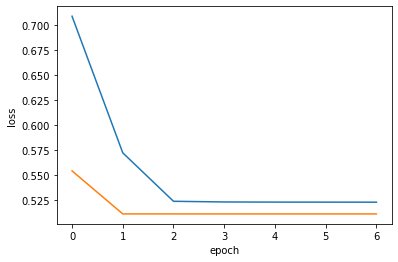

In [179]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [180]:
loss = model.evaluate(test_ds)
print(loss)

14/14 [==============================] - 0s 6ms/step - loss: 0.3395 - mse: 0.3395
[0.33946773409843445, 0.33946773409843445]
